In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
from io import StringIO

In [3]:
dataset = load_iris()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Categorical.from_codes(dataset.target, dataset.target_names)

In [4]:
y = pd.get_dummies(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

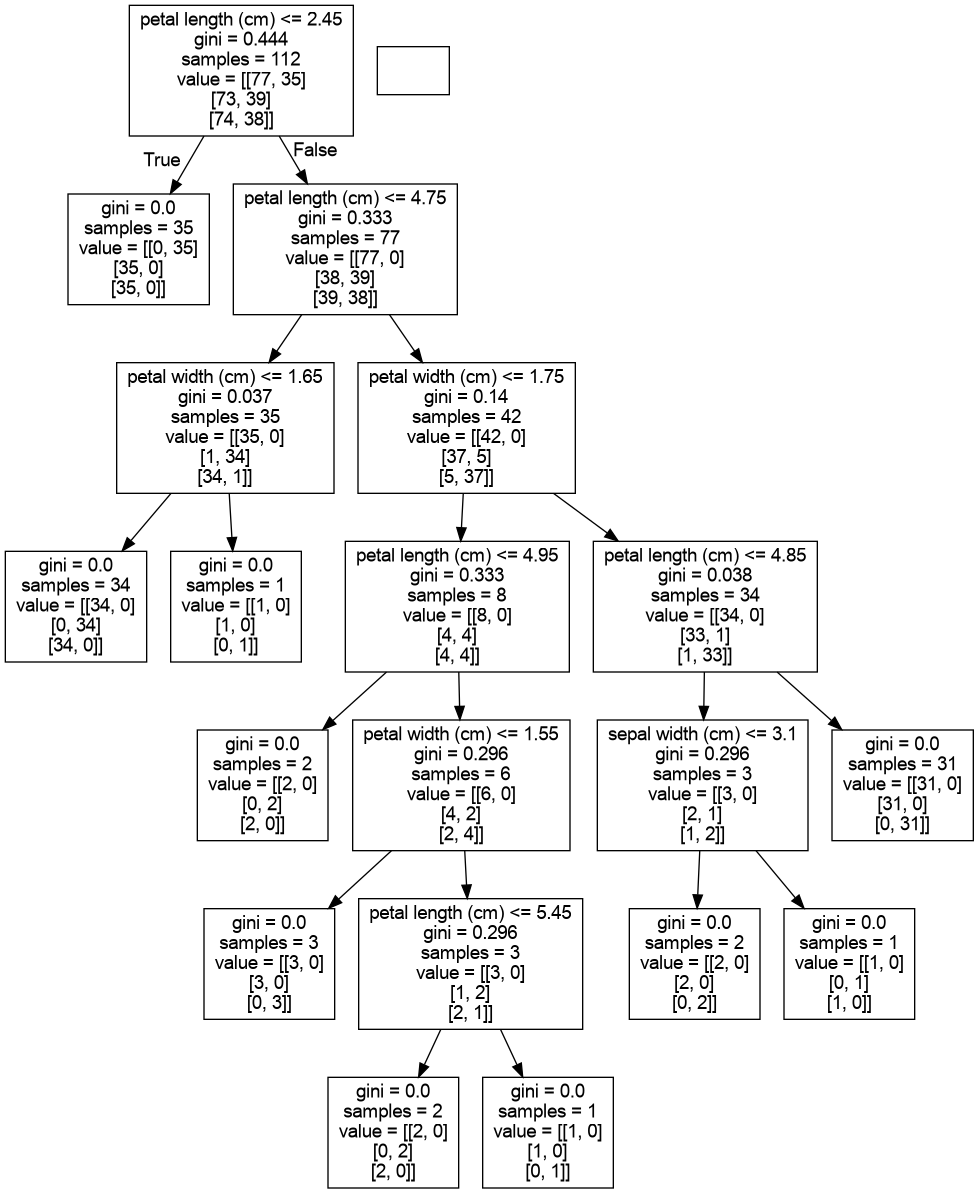

In [7]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=dataset.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [10]:
PRECISION = 10000000

def encode_tree(tree):
    print(tree.feature) 
    print(tree.threshold * PRECISION)
    print(len(tree.feature))
    print(len(tree.threshold))
encode_tree(tree.tree_)

[ 2 -2  2  3 -2 -2  3  2 -2  3 -2  2 -2 -2  2  1 -2 -2 -2]
[ 24499999.88079071 -20000000.          47500000.
  16500000.35762787 -20000000.         -20000000.
  17500000.          49500000.47683716 -20000000.
  15500000.11920929 -20000000.          54500000.47683716
 -20000000.         -20000000.          48500001.43051147
  31000000.23841858 -20000000.         -20000000.
 -20000000.        ]
19
19


In [21]:
tree.predict([X_test.iloc[0]])

/home/semar/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0, 1, 0]], dtype=uint8)

In [22]:
X_test.iloc[0] * PRECISION 

sepal length (cm)    610000000.0
sepal width (cm)     280000000.0
petal length (cm)    470000000.0
petal width (cm)     120000000.0
Name: 73, dtype: float64